In [1]:
#importing required libraries

import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import sklearn
import warnings
warnings.filterwarnings('ignore')

# Importing Dataset :

In [2]:
df=pd.read_csv("censusincome.csv")
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


Above is my dataset and i have some numerical columns and some categorical columns.But i have to predict wheather a person has income of $50k per year.So from this respective statement i can say that my target is Income and this is a Classification Poblem.

# EDA :

In [3]:
# Checking No of Rows and columns :
    
df.shape

(32560, 15)

It has 32560 rows and 15 columns

In [4]:
# First 5 rows of dataset :

df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [5]:
# Last 5 rows of dataset :

df.tail()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [6]:
# Checking columns name:

df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

Above are the list of column names in the dataset.

In [7]:
# Checking datatypes of all columns :

df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

 I have two types of columns int type and object type.

As per problem statement Target variable i.e. income is object type so it is classification problem

In [8]:
#Checking the info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


It looks very clear that i don't have any empty observations in my dataset

In [9]:
# Checking Missing values in dataset :

df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

There is no missing values so it is good , otherwise we have to treat missing values

# Heatmap of Null Values

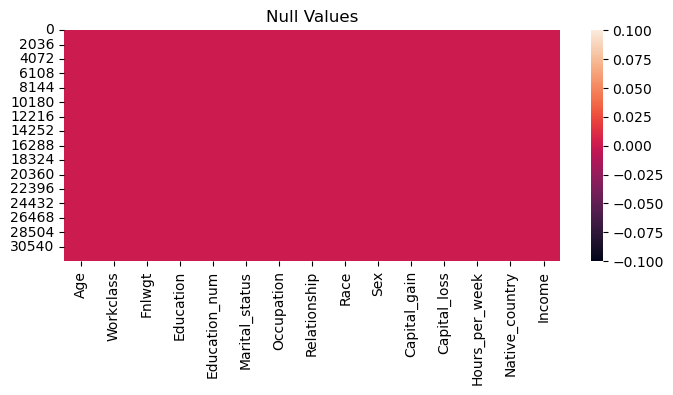

In [10]:
#Visualizeing null values

plt.figure(figsize=[8,3])
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

By Visualization,I can see in graph that there is no null values in the given dataset.

In [11]:
#Checking unique values of each columns

df.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

Above are the unique value count of each column in the dataset.

In [12]:
#Checking value counts of target column

df['Income'].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

There are only two unique counts in the target column so it's a binary classification problem.

In [13]:
#Checking for empty observations

df.loc[df['Income'] == " "]

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income


There is no empty observations in my dataset.

CHECKING WHITE SPACE VALUES :

In [14]:
#Lets check the value count of each column to see if there are any unexpected and unwanted entries present in the column.
for i in df.columns:
        print(df[i].value_counts())
        
        print('//Next Column Data//')

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64
//Next Column Data//
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
//Next Column Data//
164190    13
203488    13
123011    13
148995    12
126675    12
          ..
325573     1
140176     1
318264     1
329205     1
257302     1
Name: Fnlwgt, Length: 21647, dtype: int64
//Next Column Data//
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th   

There are some '?' entries in Workclass, Occupation and Native_country column.

So I will replace this '?' with the mode of the above columns, since they are categorical columns.

In [15]:
# let's check the mode of Workclass column
df["Workclass"].mode()                                        # we will fill the '?' values with this mode value

0     Private
Name: Workclass, dtype: object

In [16]:
# let's check the mode of Occupation column
df["Occupation"].mode()                                       # we will fill the '?' values with this mode value

0     Prof-specialty
Name: Occupation, dtype: object

In [17]:
# let's check the mode of Native_country column
df["Native_country"].mode()                                   # we will fill the '?' values with this mode value

0     United-States
Name: Native_country, dtype: object

In [18]:
df['Workclass'] = df.Workclass.str.replace('?', 'Private')
df['Occupation'] = df.Occupation.str.replace('?', 'Prof-specialty')
df['Native_country'] = df.Native_country.str.replace('?', 'United-States')

I have found respective mode values and replaced all '?' with these mode values.

In [19]:
#Checking the value count of Capital_gain column

df["Capital_gain"].value_counts()

0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
1111         1
2538         1
22040        1
4931         1
5060         1
Name: Capital_gain, Length: 119, dtype: int64

In this perticular Capital_gain column there are maximum zero values so let me drop this column.

In [20]:
#Droping Capital_gain column

df = df.drop(["Capital_gain"],axis=1)

In [21]:
#Checking the value count of Capital_loss column
df["Capital_loss"].value_counts()

0       31041
1902      202
1977      168
1887      159
1848       51
        ...  
2080        1
1539        1
1844        1
2489        1
1411        1
Name: Capital_loss, Length: 92, dtype: int64

In this perticular Capital_loss column there are maximum zero values so let me drop this column.

In [22]:
#Droping Capital_loss column

df = df.drop(["Capital_loss"],axis=1)

In [23]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,<=50K


Now our dataset has 13 columns

# Data Analysis and Visulization

Statistical measure of dataset :

In [24]:
df.describe()

,Age,Fnlwgt,Education_num,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,40.437469
std,13.640642,1.055498e+05,2.572709,12.347618
min,17.000000,1.228500e+04,1.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99.000000


Describe method will be summary only for numerical columns by default. All statistical data shown for each parameters like mean, minimum, maximum , 25th percentile means how much value for each column are below 25th percentile ,similarly for 50th perecntile and 75th perecntile.

In [25]:
#want to describe along categorical data

In [26]:
df.describe(include=['O'])

,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country,Income
count,32560,32560,32560,32560,32560,32560,32560,32560,32560
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,24532,10501,14976,5983,13193,27815,21789,29752,24719


# Finding Columns as (Categorical) V/S (Numerical) Columns :

In [27]:
# Separating categorical columns :

categorical_columns=[]

for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_columns.append(i)
print(categorical_columns)

['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']


Here, we found out list of categorical columns.

In [28]:
# Separating numerical columns:

numerical_columns=[]

for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_columns.append(i)
print(numerical_columns)

['Age', 'Fnlwgt', 'Education_num', 'Hours_per_week']


Here, we found out list of numerical columns.

# Univariate Analysis:

We Draw Countplot/Histogram for Categorical Columns as it will give the frequency of the classes of the columns and Ditribution/Density plot for Numerical data as tells about density curve and skewness.

<Axes: xlabel='Income', ylabel='count'>

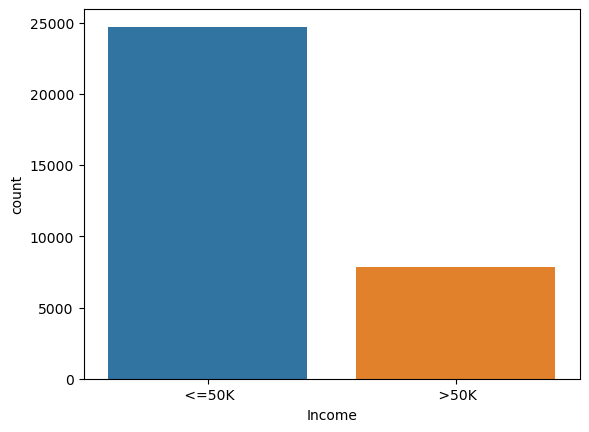

In [29]:
#Count plot for Income
sns.countplot(x='Income',data=df)

There is a data imbalancing issue.And also i can say that People with saalary >50k per year are very less.Most of the people are getting income below 50k per year.

<Axes: xlabel='Workclass', ylabel='count'>

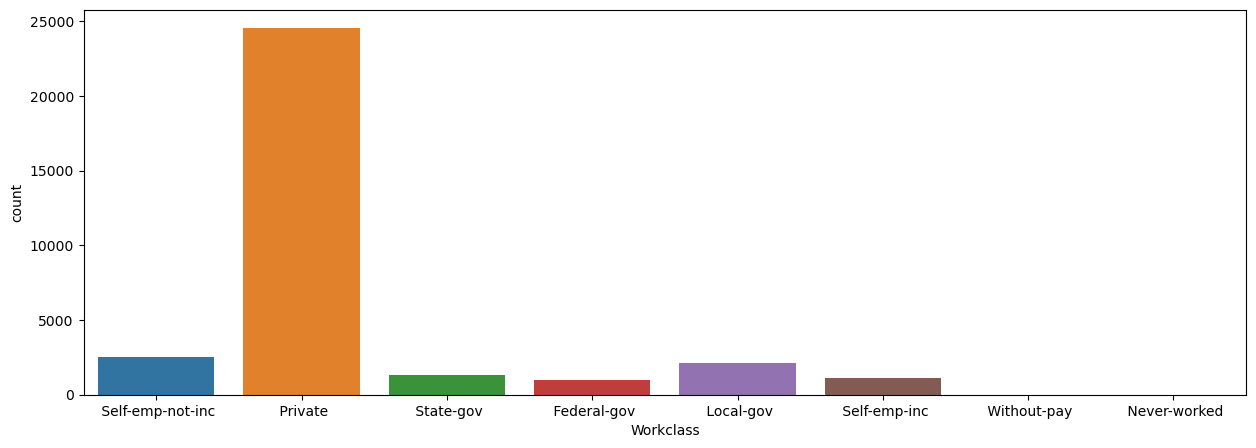

In [30]:
# Workclass Countplot
plt.figure(figsize=[15,5])
sns.countplot(x='Workclass',data=df)

Maximum people has choosen Private sector for working.And very few people choosed work Without-pay and Never-worked.

<Axes: xlabel='Education', ylabel='count'>

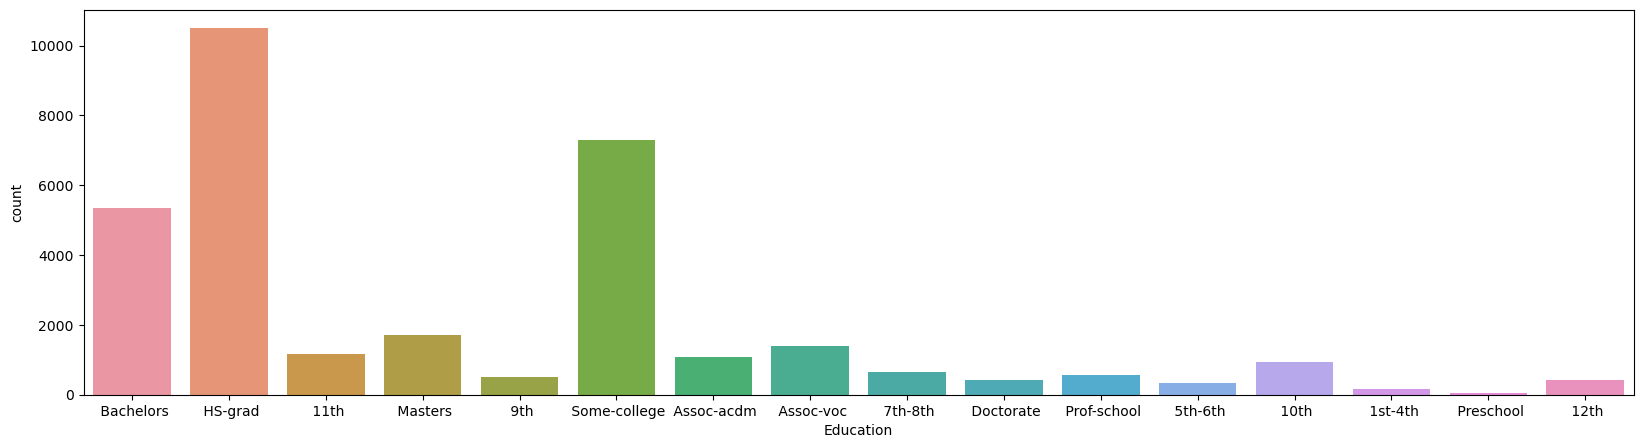

In [31]:
# Education Countplot
plt.figure(figsize=[20,5])
sns.countplot(x='Education',data=df)

Above plot says that HS-grad, Bachelors and Some-college has maximum count, which means most of the working people with these 3 types of education has more chance to get job.

<Axes: xlabel='Marital_status', ylabel='count'>

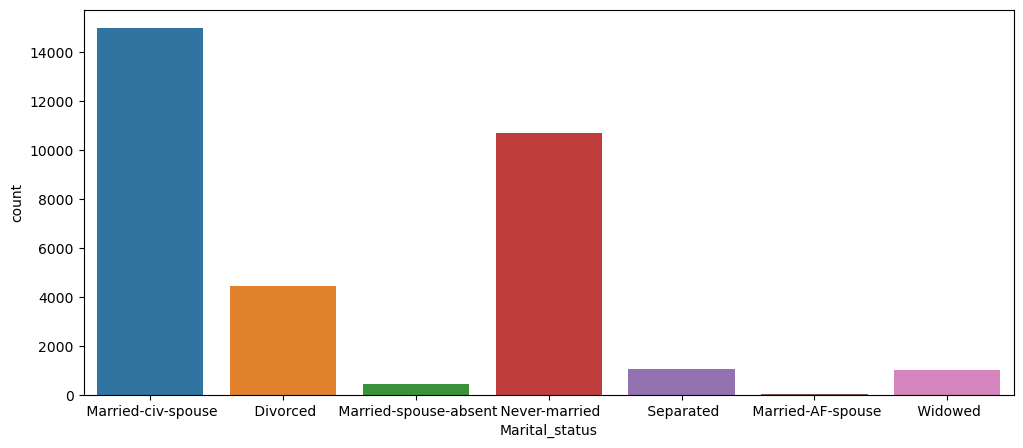

In [32]:
#Count plot for Marital_status
plt.figure(figsize=[12,5])
sns.countplot(x='Marital_status',data=df)

People who are Married-civ-spouse, Never-married are more in number and Married-AF-spouse is too less in number.

<Axes: xlabel='Occupation', ylabel='count'>

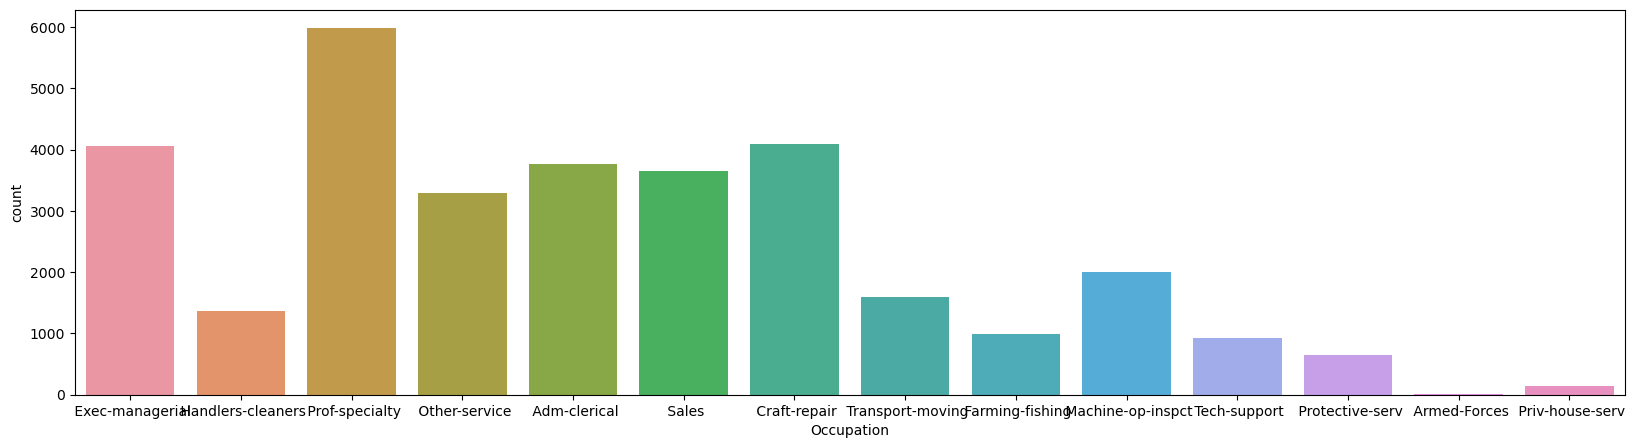

In [33]:
#Count plot for Occupation
plt.figure(figsize=[20,5])
sns.countplot(x='Occupation',data=df)

Most of the people has choosen Prof-specialty,Exec-managerial, Craft-repair as there Occupation except this Priv-house-serv and Armed-Forces are very less in count.

<Axes: xlabel='Relationship', ylabel='count'>

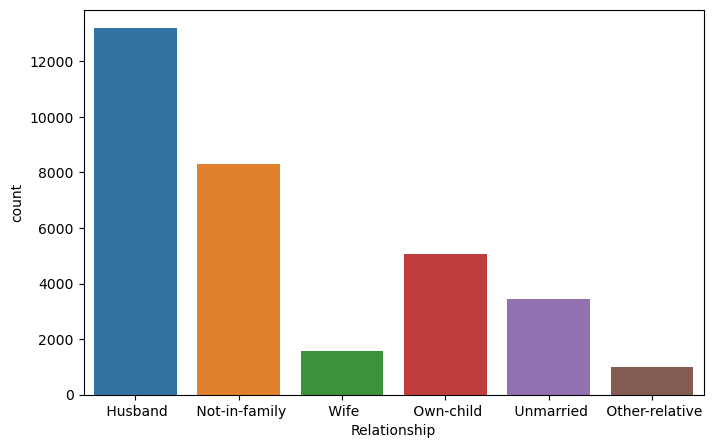

In [34]:
#Count plot for Relationship
plt.figure(figsize=[8,5])
sns.countplot(x='Relationship',data=df)

Most of the count is with Husband, Not-in-family and own-child.

<Axes: xlabel='Race', ylabel='count'>

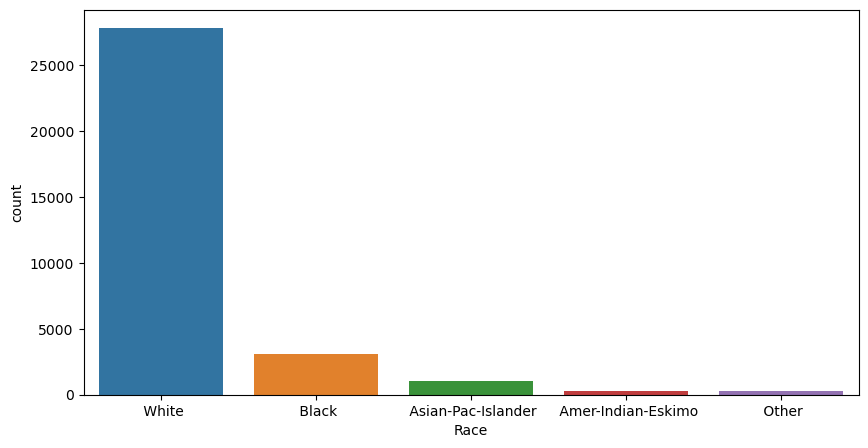

In [35]:
#Count plot for Race
plt.figure(figsize=[10,5])
sns.countplot(x='Race',data=df)

In US white people have more chance of getting job than any other raced people.

<Axes: xlabel='Sex', ylabel='count'>

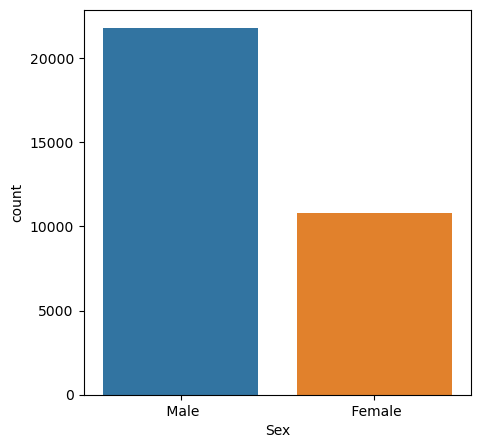

In [36]:
#Count plot for Sex
plt.figure(figsize=[5,5])
sns.countplot(x='Sex',data=df)

Males have high count of getting job than women.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40]),
 [Text(0, 0, ' United-States'),
  Text(1, 0, ' Cuba'),
  Text(2, 0, ' Jamaica'),
  Text(3, 0, ' India'),
  Text(4, 0, ' Mexico'),
  Text(5, 0, ' South'),
  Text(6, 0, ' Puerto-Rico'),
  Text(7, 0, ' Honduras'),
  Text(8, 0, ' England'),
  Text(9, 0, ' Canada'),
  Text(10, 0, ' Germany'),
  Text(11, 0, ' Iran'),
  Text(12, 0, ' Philippines'),
  Text(13, 0, ' Italy'),
  Text(14, 0, ' Poland'),
  Text(15, 0, ' Columbia'),
  Text(16, 0, ' Cambodia'),
  Text(17, 0, ' Thailand'),
  Text(18, 0, ' Ecuador'),
  Text(19, 0, ' Laos'),
  Text(20, 0, ' Taiwan'),
  Text(21, 0, ' Haiti'),
  Text(22, 0, ' Portugal'),
  Text(23, 0, ' Dominican-Republic'),
  Text(24, 0, ' El-Salvador'),
  Text(25, 0, ' France'),
  Text(26, 0, ' Guatemala'),
  Text(27, 0, ' China'),
  Text(28, 0, ' Japan'),
  Text(29, 0, ' Yugoslavia'

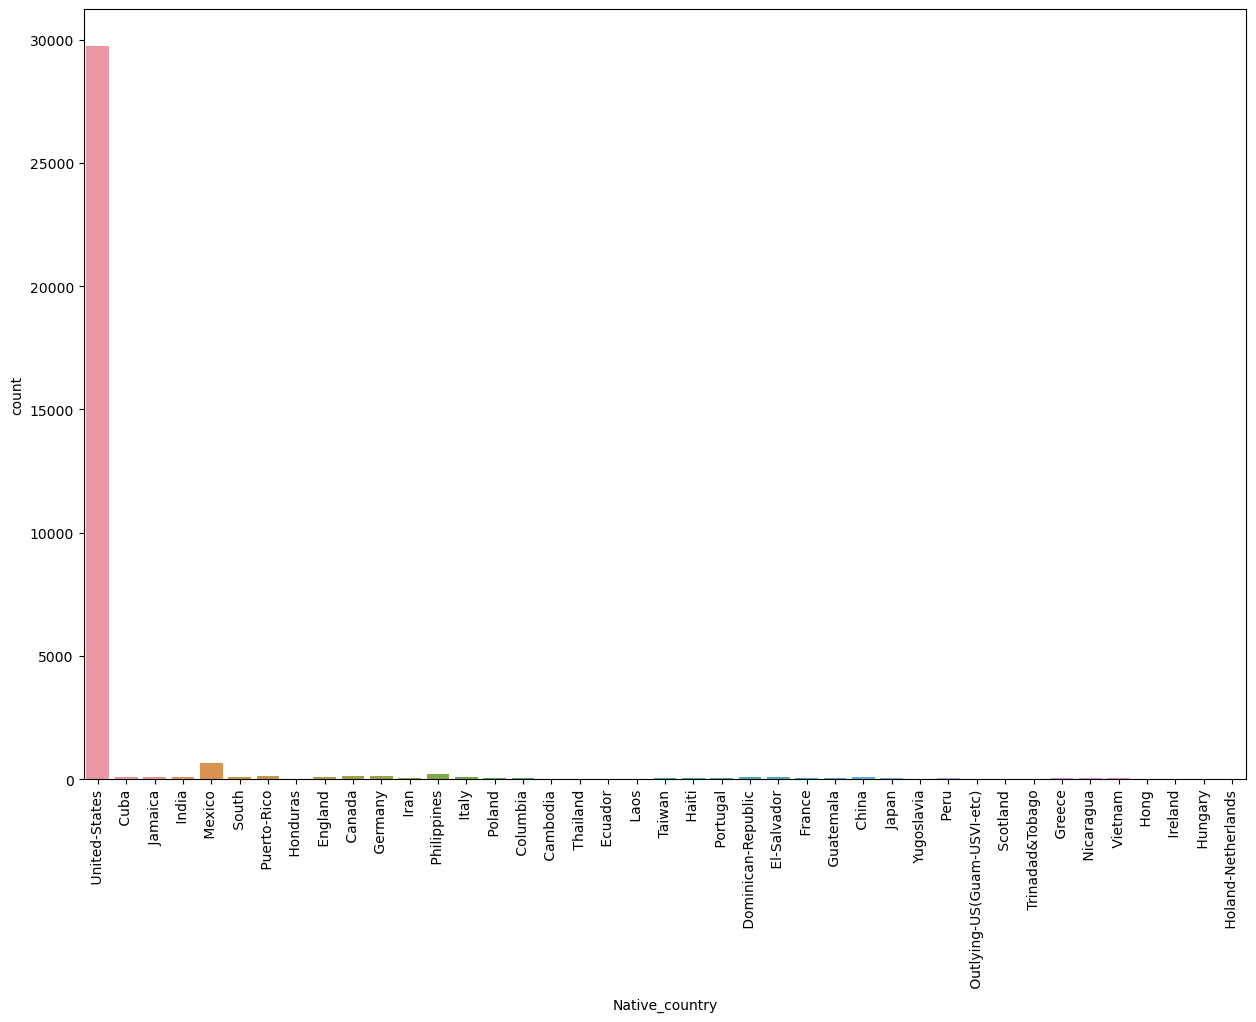

In [37]:
#Count plot for Native_country
plt.figure(figsize=[15,10])
sns.countplot(x='Native_country',data=df)
plt.xticks(rotation=90)

Most of the people gets job in US rather than all other country.

In [38]:
## Ditribution/Density plot for Numerical Data

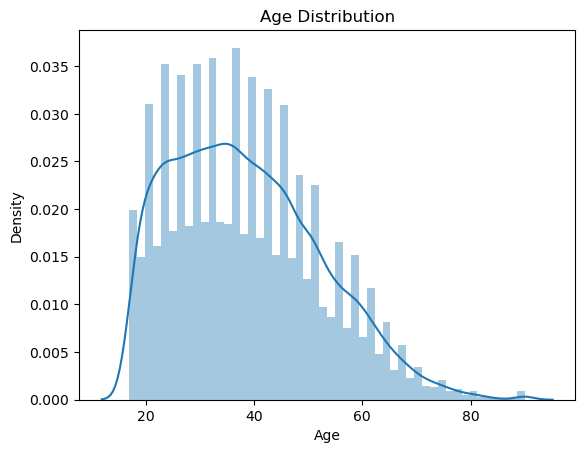

In [39]:
# Distribution Plot for Age :
    
sns.distplot(df['Age'])
plt.title("Age Distribution")
plt.show()

There is less skewness.

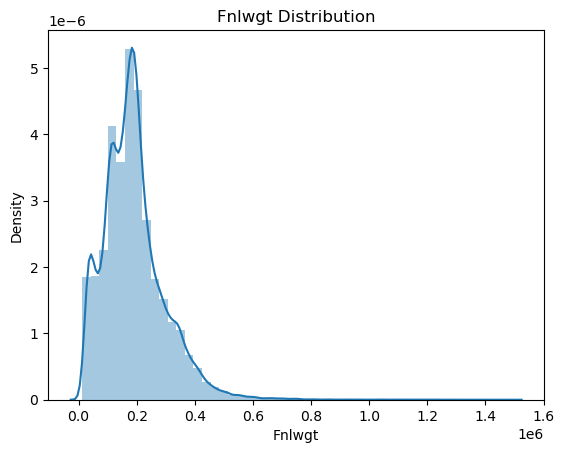

In [40]:
# Distribution Plot for Fnlwgt :
    
sns.distplot(df['Fnlwgt'])
plt.title("Fnlwgt Distribution")
plt.show()

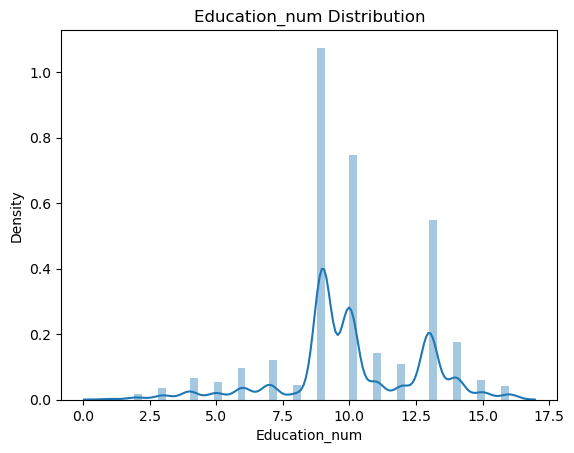

In [41]:
# Distribution Plot for Education_num :
    
sns.distplot(df['Education_num'])
plt.title("Education_num Distribution")
plt.show()

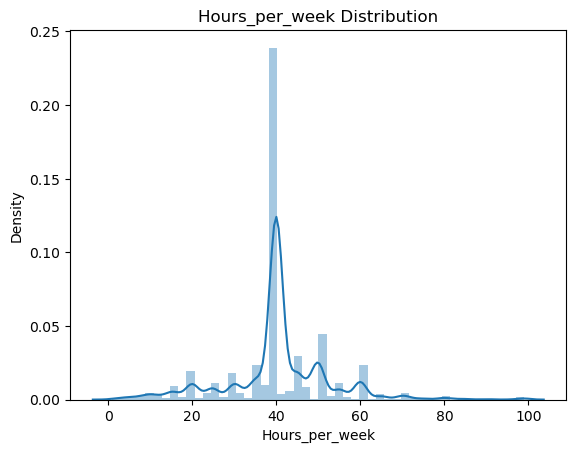

In [42]:
# Distribution Plot for Hours_per_week :
    
sns.distplot(df['Hours_per_week'])
plt.title("Hours_per_week Distribution")
plt.show()

All the numerical columns are highly skewed but skewness is less in case of Age.

In [43]:
## BIVARIATE ANALYSIS :

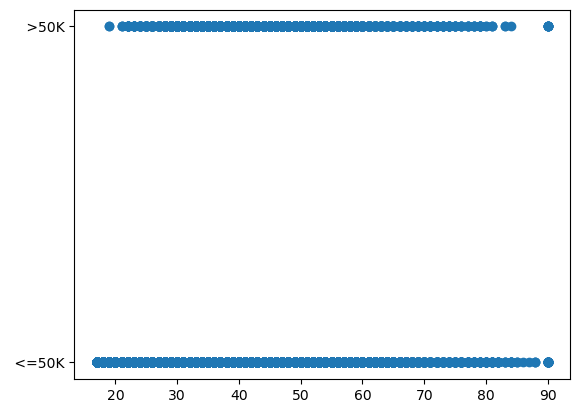

In [44]:
# Age vs Income

plt.scatter(df['Age'],df['Income'])

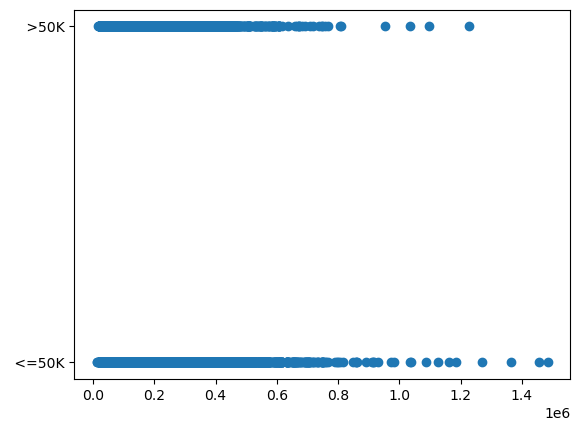

In [45]:
# Fnlwgt vs Income

plt.scatter(df['Fnlwgt'],df['Income'])

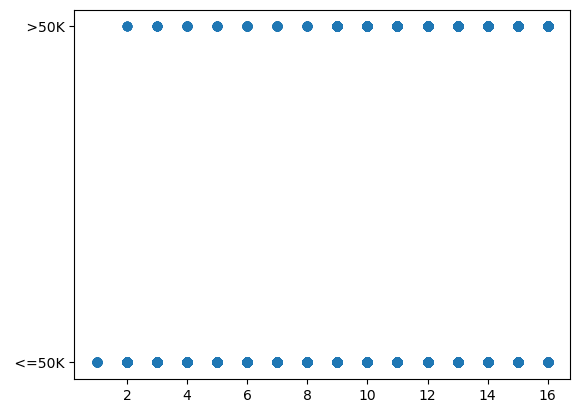

In [46]:
# Education_num vs Income

plt.scatter(df['Education_num'],df['Income'])

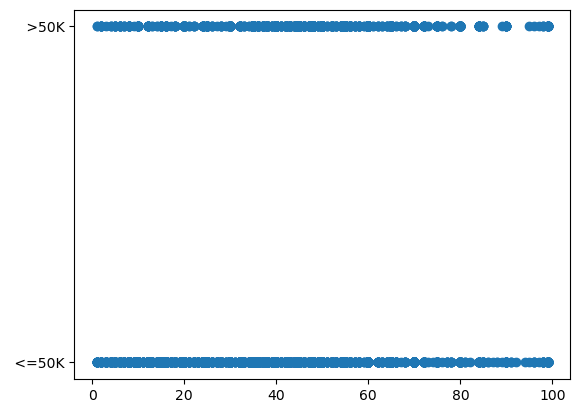

In [47]:
# Hours_per_week vs Income

plt.scatter(df['Hours_per_week'],df['Income'])

# Multivariate Analysis :

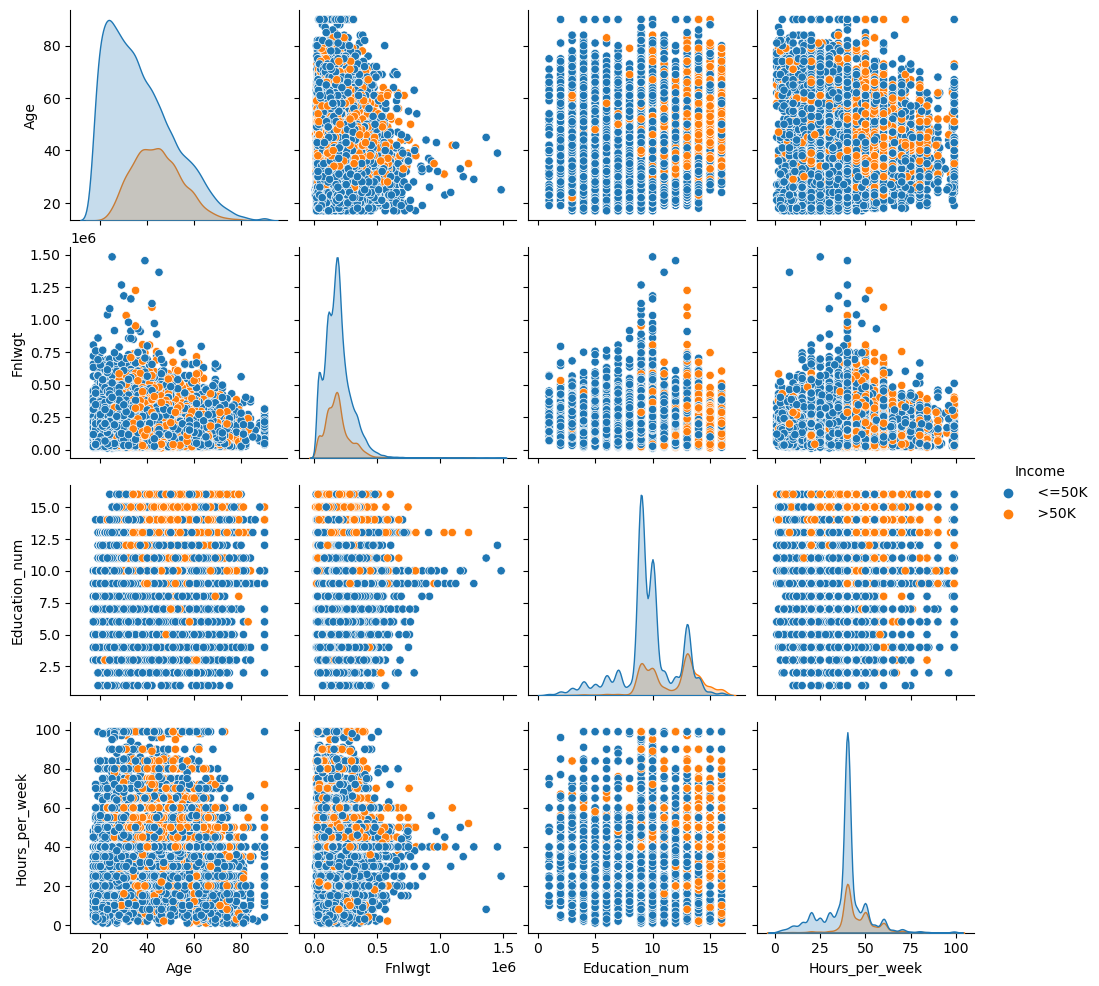

In [48]:
#pair ploting for df

sns.pairplot(df,hue="Income")

There are some extreme outliers in the dataset and some skewness also.

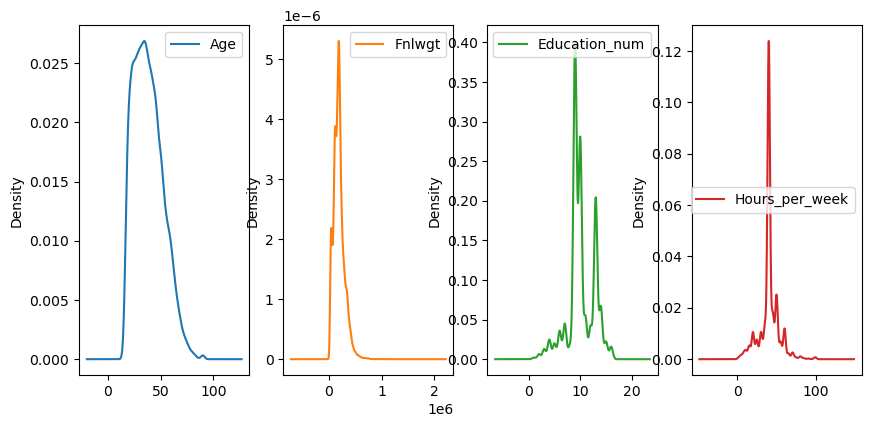

In [49]:
df.plot(kind='density',subplots=True,layout=(2,7),sharex=False,legend=True,figsize=(18,10))
plt.show()

#Observation : As datas are not perfectly well shaped curved,so have to remove skewness

# Outliers Detection and Removal:

<Axes: >

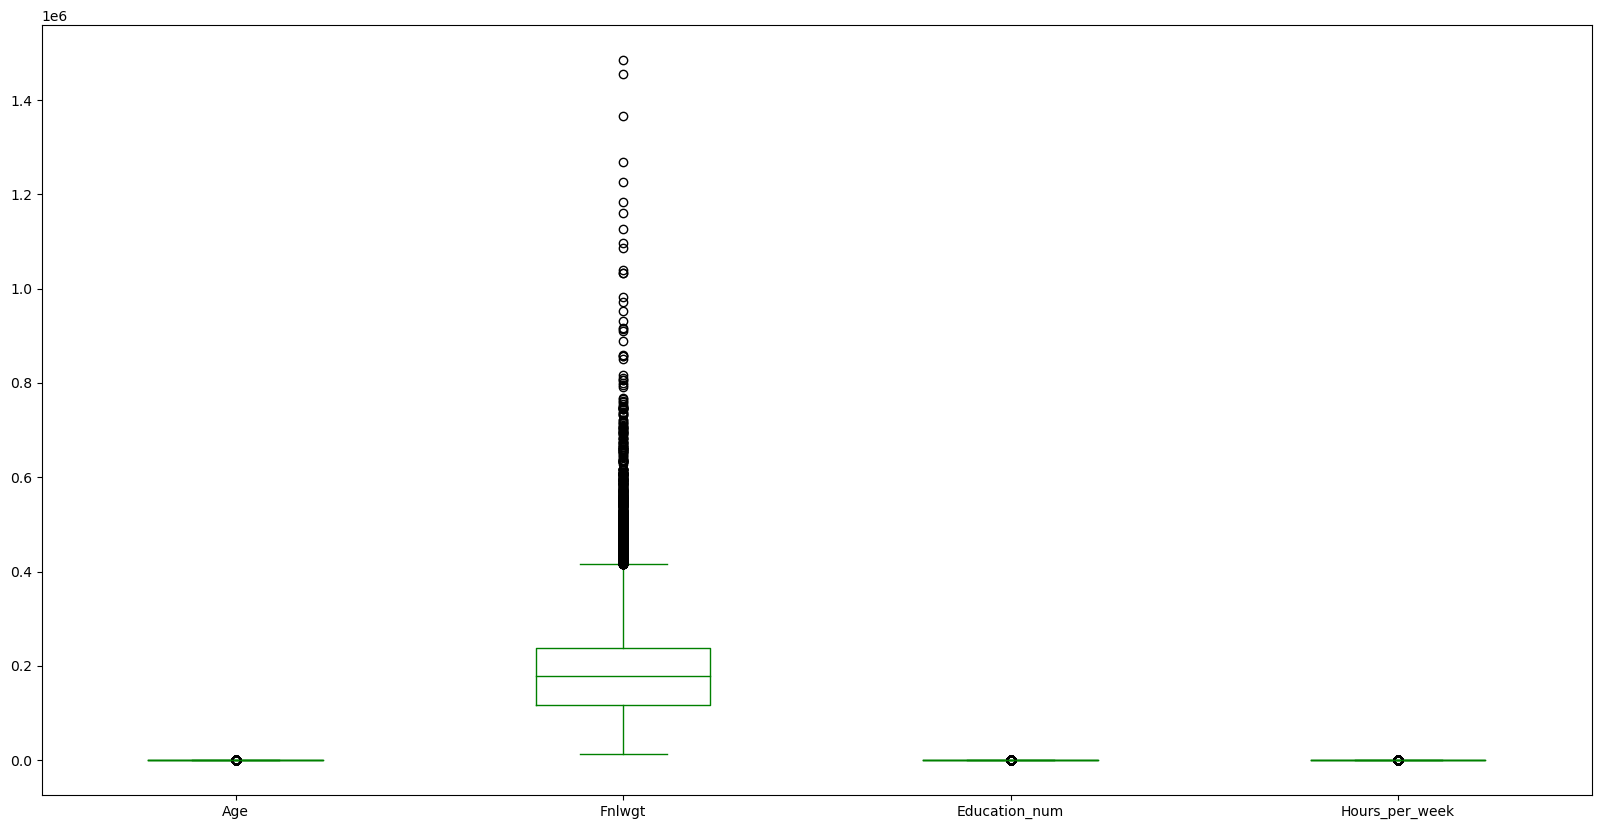

In [50]:
df.plot(kind='box',fontsize=10,figsize=(20,10),color='g')

By observing the box plot i can say that there are outliers: High outliers present in Fnlwgt column , other has less outliers. martital status , occupation and relationship and sex has no outliers.

Removing Outliers :

In [51]:
# Zscore method:

#Features having outliers
features=df[['Age','Fnlwgt','Education_num','Hours_per_week']]

In [52]:
from scipy.stats import zscore
z=np.abs(zscore(features))
df_new=df[(z<3).all(axis=1)]
df_new

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,<=50K


So,I have removed outliers by using Zscore.

In [53]:
#Checking shape of new dataset

df_new.shape

(31461, 13)

There are 31461 rows and 12 columns of shape of new dataset after removing outliers.

In [54]:
#Checking shape of old dataset
df.shape

(32560, 13)

There were 32560 rows and 12 columns in old dataset.

In [55]:
# % Data Loss

data_loss=(32560-31461)/32560*100
print(data_loss)

3.3753071253071254


I can see dataloss in zscore method after removing outliers of 3.3% which is less than 10%. So we check Skewness now.

# Encoding Categorical columns

In [56]:
# As our data has lot of string/object values so convert in numerical data

In [57]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in df_new.columns:
    if df_new[i].dtypes=="object":
        df_new[i]=le.fit_transform(df_new[i].values.reshape(-1,1))
df_new

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50,5,83311,8,13,2,3,0,4,1,13,38,0
1,38,3,215646,10,9,0,5,1,4,1,40,38,0
2,53,3,234721,1,7,2,5,0,2,1,40,38,0
3,28,3,338409,8,13,2,9,5,2,0,40,4,0
4,37,3,284582,11,14,2,3,5,4,0,40,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,3,257302,6,12,2,12,5,4,0,38,38,0
32556,40,3,154374,10,9,2,6,0,4,1,40,38,1
32557,58,3,151910,10,9,6,0,4,4,0,40,38,0
32558,22,3,201490,10,9,4,0,3,4,1,20,38,0


# Correlation :

In [58]:
#Now we check correlation of input parameters with output "quality" :
#positively correlated : direct correlation
#negatively correlated : negative correlation

In [59]:
dfcor=df_new.corr()
dfcor

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
Age,1.000000,0.038024,-0.072973,-0.000447,0.053361,-0.286424,-0.001321,-0.268028,0.030679,0.091664,0.097510,-0.001039,0.248351
Workclass,0.038024,1.000000,-0.020827,0.004652,0.003831,-0.020597,0.007551,-0.056825,0.046295,0.070095,0.030311,-0.001602,0.003494
Fnlwgt,-0.072973,-0.020827,1.000000,-0.024197,-0.034867,0.028696,0.002762,0.006698,-0.011075,0.028879,-0.014701,-0.059454,-0.007943
Education,-0.000447,0.004652,-0.024197,1.000000,0.356040,-0.039094,-0.041224,-0.015121,0.015552,-0.024911,0.061325,0.068374,0.077526
Education_num,0.053361,0.003831,-0.034867,0.356040,1.000000,-0.065568,0.073927,-0.102497,0.030849,0.016662,0.160483,0.054510,0.337595
Marital_status,-0.286424,-0.020597,0.028696,-0.039094,-0.065568,1.000000,0.034640,0.185772,-0.067546,-0.127375,-0.197532,-0.017606,-0.198475
Occupation,-0.001321,0.007551,0.002762,-0.041224,0.073927,0.034640,1.000000,-0.037549,-0.004094,0.047864,-0.019943,-0.003666,0.034612
Relationship,-0.268028,-0.056825,0.006698,-0.015121,-0.102497,0.185772,-0.037549,1.000000,-0.115216,-0.582940,-0.263412,-0.010871,-0.251506
Race,0.030679,0.046295,-0.011075,0.015552,0.030849,-0.067546,-0.004094,-0.115216,1.000000,0.088642,0.045331,0.122051,0.072451
Sex,0.091664,0.070095,0.028879,-0.024911,0.016662,-0.127375,0.047864,-0.582940,0.088642,1.000000,0.239039,0.002060,0.216665


<Axes: >

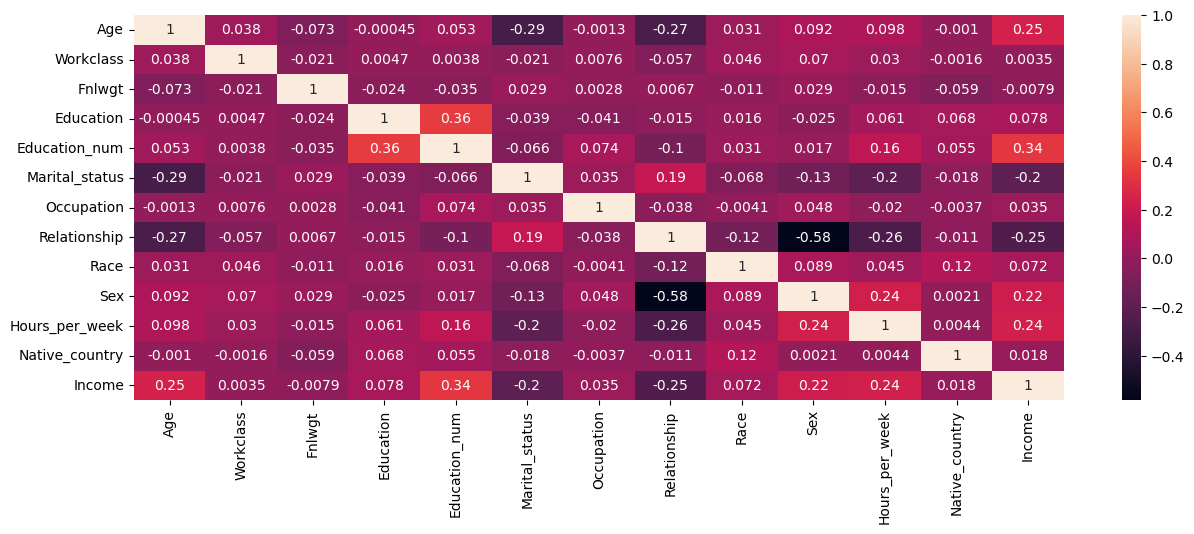

In [60]:
# For better understanding of correlation matrix between columns we draw heatmap :

plt.figure(figsize=(15,5))
sns.heatmap(dfcor,annot=True)

<Axes: >

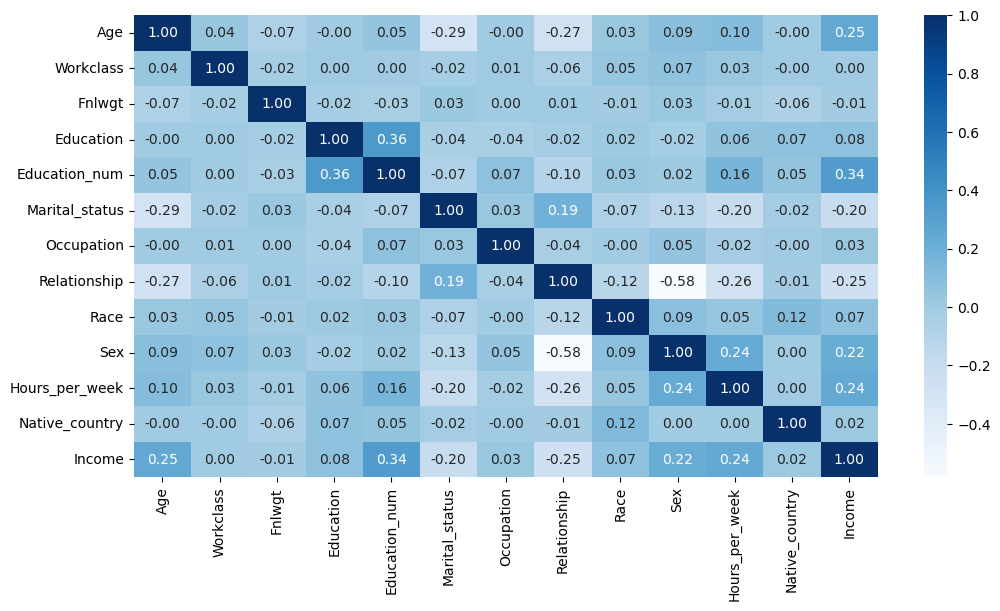

In [61]:
# We can change color also and decimal values place :

plt.figure(figsize=(12,6))
sns.heatmap(dfcor,annot=True,cmap='Blues',fmt='0.2f',cbar=True,square=False)

In [62]:
#Correlation of all columns with the target column 'Income':

In [63]:
df_new.corr()["Income"].sort_values()

Relationship     -0.251506
Marital_status   -0.198475
Fnlwgt           -0.007943
Workclass         0.003494
Native_country    0.017698
Occupation        0.034612
Race              0.072451
Education         0.077526
Sex               0.216665
Hours_per_week    0.242383
Age               0.248351
Education_num     0.337595
Income            1.000000
Name: Income, dtype: float64

There is no multicolinearity issue.
Workclass and Fnlwgt has very less correlation with target "Income"
Native_country, Occupation, Race and Education has less correlation with target column.

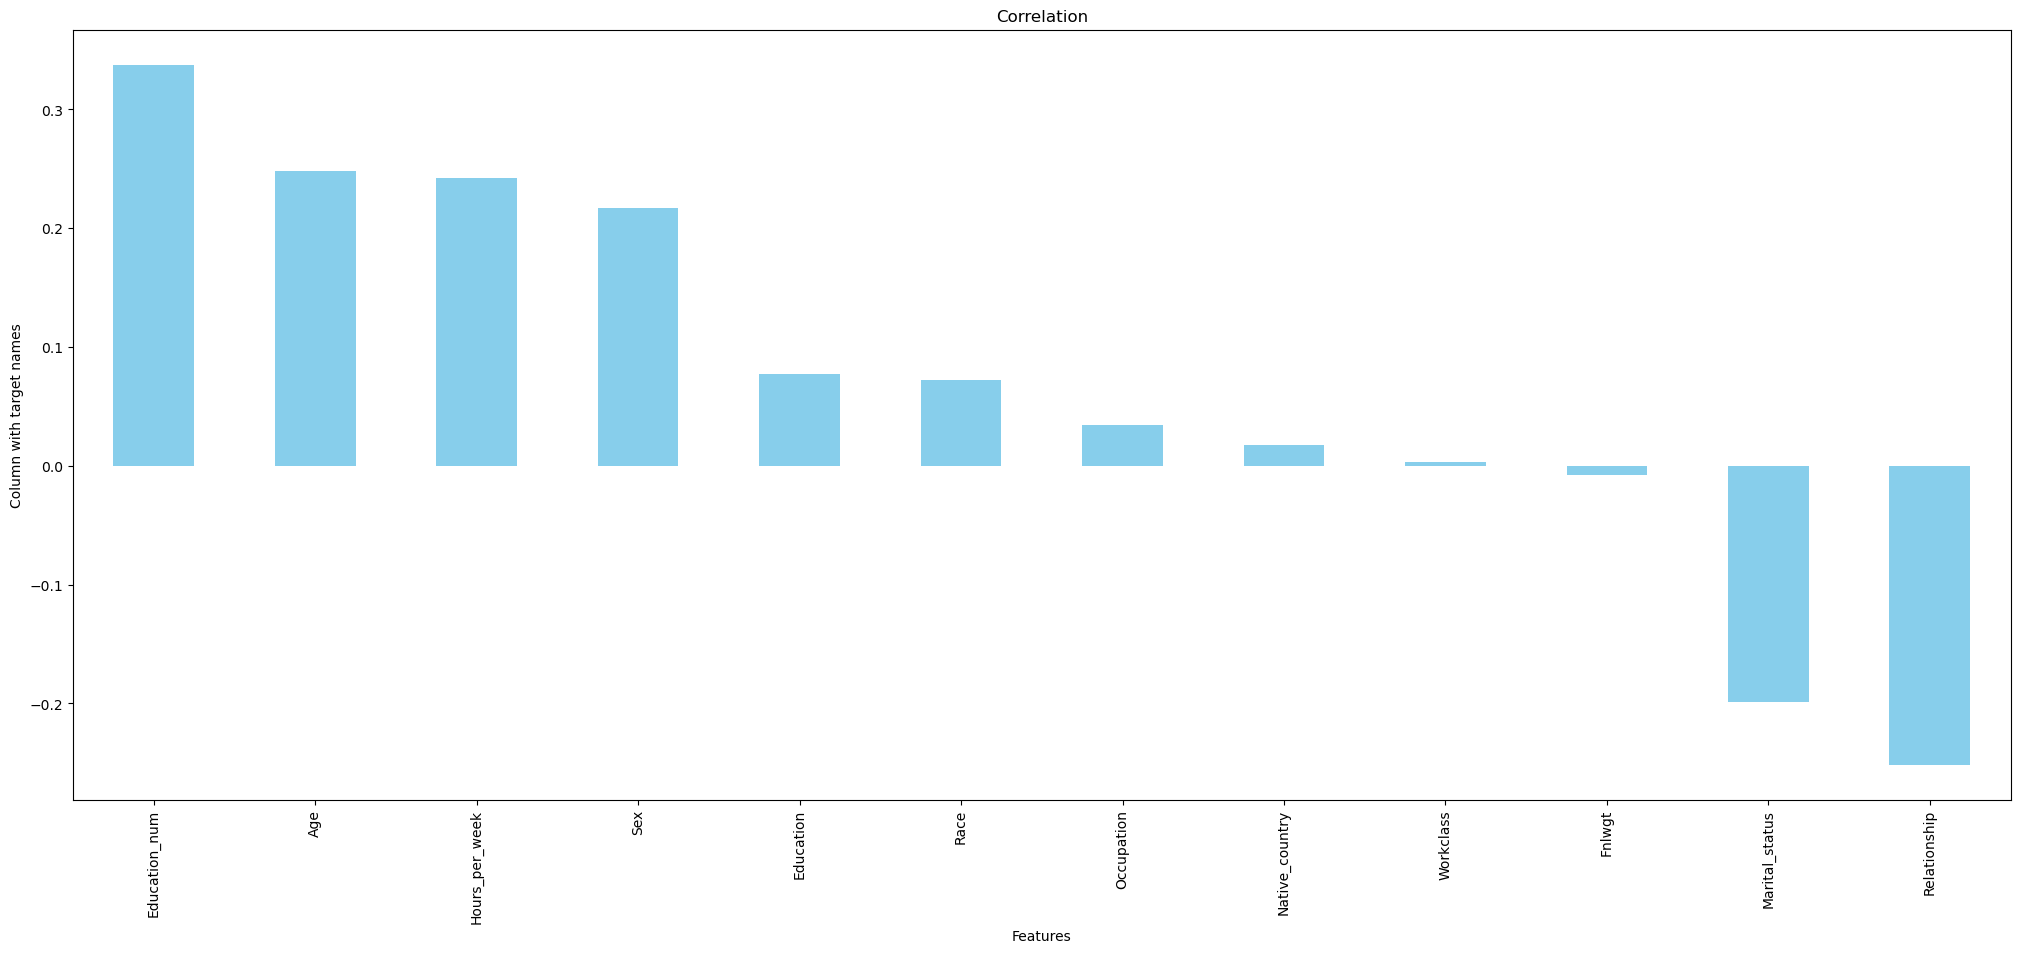

In [64]:
plt.figure(figsize =(25, 10))
df_new.corr()['Income'].sort_values(ascending = False).drop(['Income']).plot(kind ='bar', color ='skyblue')
plt.xlabel('Features')
plt.ylabel('Column with target names')
plt.title('Correlation')
plt.show()

Very-2 less Muticolinerity present in Workclass so we drop this column.

In [65]:
#Droping less correlated column
df_new= df_new.drop(["Workclass"],axis=1)

# Data Preprocessing :

Splitting the columns :

In [66]:
x=df_new.iloc[:,0:-1]
y=df_new.iloc[:,-1]

In [67]:
x

,Age,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country
0,50,83311,8,13,2,3,0,4,1,13,38
1,38,215646,10,9,0,5,1,4,1,40,38
2,53,234721,1,7,2,5,0,2,1,40,38
3,28,338409,8,13,2,9,5,2,0,40,4
4,37,284582,11,14,2,3,5,4,0,40,38
...,...,...,...,...,...,...,...,...,...,...,...
32555,27,257302,6,12,2,12,5,4,0,38,38
32556,40,154374,10,9,2,6,0,4,1,40,38
32557,58,151910,10,9,6,0,4,4,0,40,38
32558,22,201490,10,9,4,0,3,4,1,20,38


In [68]:
y

0        0
1        0
2        0
3        0
4        0
        ..
32555    0
32556    1
32557    0
32558    0
32559    1
Name: Income, Length: 31461, dtype: int32

# Handling Imbalance Data :

In [69]:
# Oversampling

from imblearn.over_sampling import SMOTE
SM=SMOTE()
x,y=SM.fit_resample(x,y)
y.value_counts()   

0    23853
1    23853
Name: Income, dtype: int64

# Check skewness

In [70]:
x.skew().sort_values(ascending=False)

Relationship      1.122112
Fnlwgt            0.646355
Marital_status    0.301898
Age               0.248953
Occupation        0.019270
Education_num    -0.292630
Hours_per_week   -0.456985
Sex              -0.823022
Education        -1.124354
Race             -2.511108
Native_country   -4.422011
dtype: float64

*Observation : High skewness present in Fnlwgt and Age and little in some parameters also so we apply Transformation.

In [71]:
#Remove Skewness - apply power transformation

from sklearn.preprocessing import power_transform
x_new=power_transform(x,method='yeo-johnson')
x_new

array([[ 0.82958463, -1.12500759, -0.57486928, ...,  0.66985773,
        -2.44062476,  0.30896099],
       [-0.1137663 ,  0.43268386,  0.18363207, ...,  0.66985773,
        -0.21175161,  0.30896099],
       [ 1.05053093,  0.61460119, -2.20832664, ...,  0.66985773,
        -0.21175161,  0.30896099],
       ...,
       [-1.09129642,  1.38552295, -1.47979316, ...,  0.66985773,
         1.2515003 ,  0.30896099],
       [-0.28206338,  2.0858034 ,  1.06019583, ...,  0.66985773,
        -0.21175161,  0.30896099],
       [ 0.75475201, -0.05104823, -0.21066316, ..., -1.4928543 ,
        -0.21175161,  0.30896099]])

In [72]:
x=pd.DataFrame(x_new,columns=x.columns)                                        #convert transformed data into DataFrame

In [73]:
x.skew().sort_values(ascending=False)

Relationship      0.360756
Hours_per_week    0.136952
Education_num     0.001082
Marital_status   -0.005625
Fnlwgt           -0.028754
Age              -0.033954
Occupation       -0.208863
Education        -0.247333
Sex              -0.823022
Race             -1.963997
Native_country   -2.859358
dtype: float64

# Feature Scaling :

In [74]:
# Scaling increases the model performance to much extent, we get best result after scaling data

# Standard Scaling :

from sklearn.preprocessing import StandardScaler
st=StandardScaler()
x1=st.fit_transform(x)
x1

array([[ 0.82958463, -1.12500759, -0.57486928, ...,  0.66985773,
        -2.44062476,  0.30896099],
       [-0.1137663 ,  0.43268386,  0.18363207, ...,  0.66985773,
        -0.21175161,  0.30896099],
       [ 1.05053093,  0.61460119, -2.20832664, ...,  0.66985773,
        -0.21175161,  0.30896099],
       ...,
       [-1.09129642,  1.38552295, -1.47979316, ...,  0.66985773,
         1.2515003 ,  0.30896099],
       [-0.28206338,  2.0858034 ,  1.06019583, ...,  0.66985773,
        -0.21175161,  0.30896099],
       [ 0.75475201, -0.05104823, -0.21066316, ..., -1.4928543 ,
        -0.21175161,  0.30896099]])

In [75]:
x=pd.DataFrame(x1,columns=x.columns)                                   #convert scaled data into DataFrame

In [76]:
# Multicollinearity Check VIF Technique

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [77]:
def vif_calc():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif["features"]=x.columns
    print(vif)
    
vif_calc()

    VIF Factor        features
0     1.242618             Age
1     1.010406          Fnlwgt
2     1.036334       Education
3     1.098079   Education_num
4     1.167582  Marital_status
5     1.017872      Occupation
6     2.011744    Relationship
7     1.053607            Race
8     1.672072             Sex
9     1.152044  Hours_per_week
10    1.047720  Native_country


* Observation : As vif value < 10 so no multicollinearity present

# Train and Test Splitting :

In [78]:
## Metrics Imported :
    
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [79]:
from sklearn.tree import DecisionTreeClassifier

maxAccu=0                            #maximum accuracy
maxRS=0                             #best random state for which max accuracy is achieved

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    dt=DecisionTreeClassifier()
    dt.fit(x_train,y_train)                                #fitting the data will train your model
    predrf=dt.predict(x_test)                              #Predicted Target Variable
    acc=accuracy_score(y_test,predrf)
    print('testing accuracy',acc,'random_state',i)
    
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
        print('max_accuracy',maxAccu,'max_random_state',i)

testing accuracy 0.8284426744917208 random_state 1
max_accuracy 0.8284426744917208 max_random_state 1
testing accuracy 0.8266610773422762 random_state 2
testing accuracy 0.8304338713058059 random_state 3
max_accuracy 0.8304338713058059 max_random_state 3
testing accuracy 0.8225738838817858 random_state 4
testing accuracy 0.8294906728149235 random_state 5
testing accuracy 0.8323202682875708 random_state 6
max_accuracy 0.8323202682875708 max_random_state 6
testing accuracy 0.8279186753301194 random_state 7
testing accuracy 0.8264514776776357 random_state 8
testing accuracy 0.8300146719765248 random_state 9
testing accuracy 0.8333682666107735 random_state 10
max_accuracy 0.8333682666107735 max_random_state 10
testing accuracy 0.8243554810312304 random_state 11
testing accuracy 0.8212114860616223 random_state 12
testing accuracy 0.8240410815342696 random_state 13
testing accuracy 0.8271850765038776 random_state 14
testing accuracy 0.8280234751624398 random_state 15
testing accuracy 0.83305

In [80]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=34)

In [81]:
x.shape,x_train.shape,x_test.shape

((47706, 11), (38164, 11), (9542, 11))

# Classification Algorithms:

Modelling :

1. LOGISTICS REGRESSION

In [82]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()

LR.fit(x_train,y_train)

LogisticRegression()

Our Model is successfully trained , Lets perform prediction

In [83]:
pred_train_lr=LR.predict(x_train)
predlr=LR.predict(x_test)
print("Training Accuracy",accuracy_score(y_train,pred_train_lr)*100) 
print("Testing Accuracy:-",accuracy_score(y_test,predlr)*100)                               #Testing Accuracy
print("CM:-",confusion_matrix(y_test,predlr))                         # Take Confusion matrix as CM
print("CR:-",classification_report(y_test,predlr))                    # Take Classification report as CR

Training Accuracy 76.78178388009643
Testing Accuracy:- 77.11171662125341
CM:- [[3517 1284]
 [ 900 3841]]
CR:-               precision    recall  f1-score   support

           0       0.80      0.73      0.76      4801
           1       0.75      0.81      0.78      4741

    accuracy                           0.77      9542
   macro avg       0.77      0.77      0.77      9542
weighted avg       0.77      0.77      0.77      9542



In [84]:
from sklearn.model_selection import cross_val_score
cr_1=cross_val_score(LR,x,y,cv=7)
print("Cross Validation Score of Logistic Regression model:-",cr_1.mean())
diff_1=accuracy_score(y_test,predlr)-cr_1.mean()
print("diff between accuracy score and cross validation score is -",diff_1)

Cross Validation Score of Logistic Regression model:- 0.7676396727146937
diff between accuracy score and cross validation score is - 0.0034774934978403227


2. Decision Tree Classifier

In [85]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [86]:
pred_train_dtc=dt.predict(x_train)
preddt=dt.predict(x_test)

print("Training Accuracy",accuracy_score(y_train,pred_train_dtc)*100) 
print("Testing Accuracy",accuracy_score(y_test,preddt)*100)            #Testing Accuracy
print("CM:-",confusion_matrix(y_test,preddt))                         # Take Confusion matrix as CM
print("CR:-",classification_report(y_test,preddt))                    # Take Classification report as CR

Training Accuracy 99.98689864794046
Testing Accuracy 83.74554600712639
CM:- [[4011  790]
 [ 761 3980]]
CR:-               precision    recall  f1-score   support

           0       0.84      0.84      0.84      4801
           1       0.83      0.84      0.84      4741

    accuracy                           0.84      9542
   macro avg       0.84      0.84      0.84      9542
weighted avg       0.84      0.84      0.84      9542



In [87]:
from sklearn.model_selection import cross_val_score
cr_2=cross_val_score(dt,x,y,cv=7)
print("Cross Validation Score of Decision Tree Classifier:-",cr_2.mean())
diff_2=accuracy_score(y_test,preddt)-cr_2.mean()
print("diff between accuracy score and cross validation score is -",diff_2)

Cross Validation Score of Decision Tree Classifier:- 0.8281791753209401
diff between accuracy score and cross validation score is - 0.009276284750323827


3. Support Vector Classifier

In [88]:
from sklearn.svm import SVC

svc=SVC()
svc.fit(x_train,y_train)

SVC()

In [90]:
pred_train_svc=svc.predict(x_train)
predsvc=svc.predict(x_test)

print("Training Accuracy",accuracy_score(y_train,pred_train_svc)*100) 
print("Testing Accuracy",accuracy_score(y_test,predsvc)*100)            #Testing Accuracy
print("CM:-",confusion_matrix(y_test,predsvc))                         # Take Confusion matrix as CM
print("CR:-",classification_report(y_test,predsvc))                    # Take Classification report as CR

Training Accuracy 84.21811130908709
Testing Accuracy 84.47914483336827
CM:- [[3808  993]
 [ 488 4253]]
CR:-               precision    recall  f1-score   support

           0       0.89      0.79      0.84      4801
           1       0.81      0.90      0.85      4741

    accuracy                           0.84      9542
   macro avg       0.85      0.85      0.84      9542
weighted avg       0.85      0.84      0.84      9542



In [91]:
from sklearn.model_selection import cross_val_score
cr_3=cross_val_score(svc,x,y,cv=7)
print("Cross Validation Score of Support Vector Classifier:-",cr_3.mean())
diff_3=accuracy_score(y_test,predsvc)-cr_3.mean()
print("diff between accuracy score and cross validation score is -",diff_3)

Cross Validation Score of Support Vector Classifier:- 0.8362059616195585
diff between accuracy score and cross validation score is - 0.00858548671412418


4. MultinomialNB

In [92]:
from sklearn.naive_bayes import MultinomialNB

mnb=MultinomialNB()
mnb.fit(abs(x_train),y_train)

MultinomialNB()

In [93]:
pred_train_mnb=mnb.predict(x_train)
predmnb=mnb.predict(x_test)

print("Training Accuracy",accuracy_score(y_train,pred_train_mnb)*100) 
print("Testing Accuracy",accuracy_score(y_test,predmnb)*100)            #Testing Accuracy
print("CM:-",confusion_matrix(y_test,predmnb))                         # Take Confusion matrix as CM
print("CR:-",classification_report(y_test,predmnb))                    # Take Classification report as CR

Training Accuracy 60.67498165810712
Testing Accuracy 60.102703835673864
CM:- [[2943 1858]
 [1949 2792]]
CR:-               precision    recall  f1-score   support

           0       0.60      0.61      0.61      4801
           1       0.60      0.59      0.59      4741

    accuracy                           0.60      9542
   macro avg       0.60      0.60      0.60      9542
weighted avg       0.60      0.60      0.60      9542



In [94]:
from sklearn.model_selection import cross_val_score
cr_4=cross_val_score(mnb,abs(x),y,cv=7)
print("Cross Validation Score of MultinomialNB:-",cr_4.mean())
diff_4=accuracy_score(y_test,predmnb)-cr_4.mean()
print("diff between accuracy score and cross validation score is -",diff_4)

Cross Validation Score of MultinomialNB:- 0.7291538451791698
diff between accuracy score and cross validation score is - -0.12812680682243116


5. KNeighbors Classifier

In [95]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier()
knn.fit((x_train),y_train)

KNeighborsClassifier()

In [96]:
pred_train_knn=knn.predict(x_train)
predknn=knn.predict(x_test)

print("Training Accuracy",accuracy_score(y_train,pred_train_knn)*100) 
print("Testing Accuracy",accuracy_score(y_test,predknn)*100)            #Testing Accuracy
print("CM:-",confusion_matrix(y_test,predknn))                         # Take Confusion matrix as CM
print("CR:-",classification_report(y_test,predknn))                    # Take Classification report as CR

Training Accuracy 88.86385074939733
Testing Accuracy 84.30098511842381
CM:- [[3998  803]
 [ 695 4046]]
CR:-               precision    recall  f1-score   support

           0       0.85      0.83      0.84      4801
           1       0.83      0.85      0.84      4741

    accuracy                           0.84      9542
   macro avg       0.84      0.84      0.84      9542
weighted avg       0.84      0.84      0.84      9542



In [98]:
from sklearn.model_selection import cross_val_score
cr_5=cross_val_score(knn,x,y,cv=7)
print("Cross Validation Score of KNeighbors Classifier:-",cr_5.mean())
diff_5=accuracy_score(y_test,predknn)-cr_5.mean()
print("diff between accuracy score and cross validation score is -",diff_5)

Cross Validation Score of KNeighbors Classifier:- 0.8380093535042488
diff between accuracy score and cross validation score is - 0.005000497679989335


# Ensemble Method :

6. Random Forest Classifier :

In [99]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [100]:
pred_train_rf=rf.predict(x_train)
predrf=rf.predict(x_test)

print("Training Accuracy",accuracy_score(y_train,pred_train_rf)*100) 
print("Testing Accuracy",accuracy_score(y_test,predrf)*100)            #Testing Accuracy
print("CM:-",confusion_matrix(y_test,predrf))                         # Take Confusion matrix as CM
print("CR:-",classification_report(y_test,predrf))                    # Take Classification report as CR

Training Accuracy 99.98427837752855
Testing Accuracy 87.03626074198282
CM:- [[4184  617]
 [ 620 4121]]
CR:-               precision    recall  f1-score   support

           0       0.87      0.87      0.87      4801
           1       0.87      0.87      0.87      4741

    accuracy                           0.87      9542
   macro avg       0.87      0.87      0.87      9542
weighted avg       0.87      0.87      0.87      9542



In [101]:
from sklearn.model_selection import cross_val_score
cr_6=cross_val_score(rf,x,y,cv=7)
print("Cross Validation Score of Random Forest Classifier:-",cr_6.mean())
diff_6=accuracy_score(y_test,predrf)-cr_6.mean()
print("diff between accuracy score and cross validation score is -",diff_6)

Cross Validation Score of Random Forest Classifier:- 0.8648413069515158
diff between accuracy score and cross validation score is - 0.00552130046831234


7. Gradient Boosting Classifier:

In [102]:
from sklearn.ensemble import GradientBoostingClassifier

gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)

GradientBoostingClassifier()

In [103]:
pred_train_gbc=gbc.predict(x_train)
predgbc=gbc.predict(x_test)

print("Training Accuracy",accuracy_score(y_train,pred_train_gbc)*100) 
print("Testing Accuracy",accuracy_score(y_test,predgbc)*100)            #Testing Accuracy
print("CM:-",confusion_matrix(y_test,predgbc))                         # Take Confusion matrix as CM
print("CR:-",classification_report(y_test,predgbc))                    # Take Classification report as CR

Training Accuracy 86.10208573524788
Testing Accuracy 86.33410186543702
CM:- [[4059  742]
 [ 562 4179]]
CR:-               precision    recall  f1-score   support

           0       0.88      0.85      0.86      4801
           1       0.85      0.88      0.87      4741

    accuracy                           0.86      9542
   macro avg       0.86      0.86      0.86      9542
weighted avg       0.86      0.86      0.86      9542



In [104]:
from sklearn.model_selection import cross_val_score
cr_7=cross_val_score(gbc,x,y,cv=7)
print("Cross Validation Score of Gradient Boosting Classifier:-",cr_7.mean())
diff_7=accuracy_score(y_test,predgbc)-cr_7.mean()
print("diff between accuracy score and cross validation score is -",diff_7)

Cross Validation Score of Gradient Boosting Classifier:- 0.8493291861710739
diff between accuracy score and cross validation score is - 0.014011832483296294


In [106]:
result = pd.DataFrame({'Models':['LR','dt','svc','mnb','knn','rf','gbc'],
                       'Accuracy':[accuracy_score(y_test,predlr)*100,
                                   accuracy_score(y_test,preddt)*100,
                                   accuracy_score(y_test,predsvc)*100,
                                   accuracy_score(y_test,predmnb)*100,
                                   accuracy_score(y_test,predknn)*100,
                                   accuracy_score(y_test,predrf)*100,
                                   accuracy_score(y_test,predgbc)*100],
                     'Difference of accuracy and cross-val':[diff_1,diff_2,diff_3,diff_4,diff_5,diff_6,diff_7]})
result        

,Models,Accuracy,Difference of accuracy and cross-val
0,LR,77.111717,0.003477
1,dt,83.745546,0.009276
2,svc,84.479145,0.008585
3,mnb,60.102704,-0.128127
4,knn,84.300985,0.005000
5,rf,87.036261,0.005521
6,gbc,86.334102,0.014012


By looking into the difference of model accuracy and cross validation score i found that RFC as best model.

# Hyper Parameter tuning:

In [ ]:
#importing necessary libraries
from sklearn.model_selection import GridSearchCV

In [ ]:
parameter = {'criterion':['gini','entropy'],
             'max_depth': [10,15,20,25],
             'n_estimators':[100,200,300,400],
             'max_features': ["auto","sqrt","log2"]}

In [ ]:
GCV=GridSearchCV(RandomForestClassifier(),parameter,cv=7)
GCV.fit(x_train,y_train)

In [ ]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 25,
 'max_features': 'log2',
 'n_estimators': 200}


Got the best parameters for RFC.

# Taking RFC as final Model

In [122]:
Final_model=RandomForestClassifier(max_features='log2',criterion='gini',n_estimators=200,max_depth=25)
Final_model.fit(x_train,y_train)
pred=Final_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

87.59169985328023


I got best model as RFC and i got the accuracy 87.55% after tunning which is good.!!!!

# ROC-AUC curve:

# Saving the model:

In [123]:
#Saving the model as .pkl file
import joblib
joblib.dump(Final_model,"Censusincome.pkl")

['Censusincome.pkl']

In [124]:
# Loading the saved model

model=joblib.load("Censusincome.pkl")

# Prediction


In [125]:
conclusion=pd.DataFrame([Final_model.predict(x_test)[:],predrf[:]],index=["Predicted","Original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,9532,9533,9534,9535,9536,9537,9538,9539,9540,9541
Predicted,0,0,1,0,0,0,1,1,1,0,...,1,1,1,0,0,0,1,1,1,0
Original,0,0,1,0,0,0,1,1,1,0,...,1,1,1,0,0,0,1,1,1,0


Above are the predicted values and the actual values.They are almost similar.

# Prediction on New Data

In [131]:
input_data=(40,154374,10,9,2,6,0,4,1,40,38)

# Changing data into numpy array
input_data_nparray=np.asarray(input_data)

# reshaping data as we are predicting label for only one instance
input_data_reshaped=input_data_nparray.reshape(1,-1)

prediction=Final_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==1):
    print('Income is >=50')
else:
    print('Income is <=50')

[1]
Income is >=50


# Thus, Completed the Census_Income Prediction.